In [1]:
!pip install diffusers accelerate safetensors transformers torch --upgrade

  Using cached safetensors-0.4.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.4 MB/s eta 0:00:00
Using cached safetensors-0.4.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 14.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 36.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 113.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-n

In [2]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

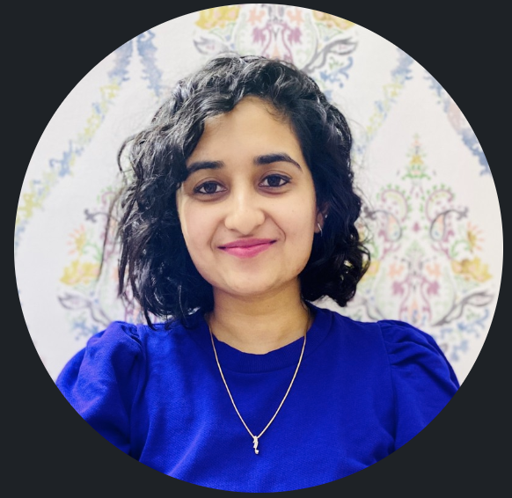

In [3]:
from PIL import Image
import requests
import random
#url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
#def download_image(url):
#    image = PIL.Image.open(requests.get(url, stream=True).raw)
#    image = PIL.ImageOps.exif_transpose(image)
image=Image.open("test.png")
image = image.convert("RGB")
image.thumbnail((512, 512))
#image = download_image(url)
image

  0%|          | 0/50 [00:00<?, ?it/s]

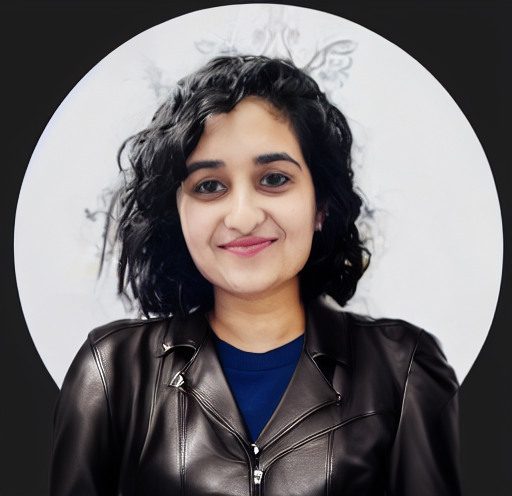

In [4]:
prompt = "add a leather jacket"
#images = pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1).images
text_cfg_scale=7.5
image_cfg_scale=1.5
seed = 1371
generator = torch.manual_seed(seed)
result_img = pipe(prompt, image=image, num_inference_steps=50,guidance_scale=text_cfg_scale,image_guidance_scale=image_cfg_scale,generator=generator).images[0]
result_img